## Collaborative FIltering

for this notebook, we will be using the Surprise package to do collaborative filtering, that is matching users to content based on users of similar tastes and preferences.  

First, let us load the data

In [2]:
import pandas as pd
import numpy as np


In [3]:
df_ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
df_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [4]:
df_users = pd.read_csv('BX-Users.csv',sep=';',error_bad_lines=False , encoding="latin-1")
df_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


Now, we only want users who have made ratings so we merge the 2 dataframe

In [5]:
df = pd.merge(df_ratings , df_users , on='User-ID' , how='inner')
df.drop(['Location','Age'],axis='columns',inplace=True)
df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Exploratory Data Analysis

Now, let us look at the distribution of the ratings

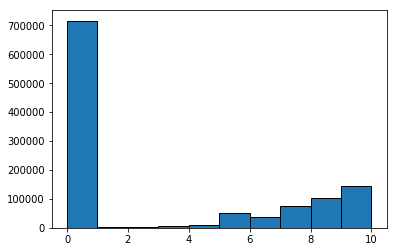

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(df['Book-Rating'],edgecolor='black')
plt.show()


Here, we can tell that most of the books are rated 0. It is possible that these books are not rated or that people tend to only rate something that is poor but not rate a good product. 

In [7]:
data = df.groupby('ISBN')['Book-Rating'].count().clip(upper=50)
data

ISBN
 0330299891       2
 0375404120       2
 0586045007       1
 9022906116       2
 9032803328       1
 9044922564       1
 9044922572       1
 9044922718       1
 9044923161       1
 904492401X       1
 9061002273       1
#069580216X       1
#6612432          1
'9607092856'      1
'9607092910'      1
(THEWINDMILLP     1
)416195113        1
)440206529        1
)452273056        1
)553267833        1
)959326839        1
*0452281903       2
*0515128325       1
+0451197399       2
,.0330486187      1
/8741060773       1
0 00 612183 7     1
0 00 614494 2     1
0 00 655241 2     1
0 09 944678 2     1
                 ..
X000000000        3
X113780760        1
X439361760        1
X903145730        1
XXXXXXXXXX        2
XXXXXXXXXXXXX     1
Y99697115         1
YOUTELLEM,AND     1
Z380703475        1
ZR902CX0093       1
ZR903CX0003       3
\0094749809"      1
\0210000010"      1
\0432534220"      1
\0432534220\""    3
\0679751521"      1
\2842053052\""    2
\8804501367\""    1
\8804520159\"" 

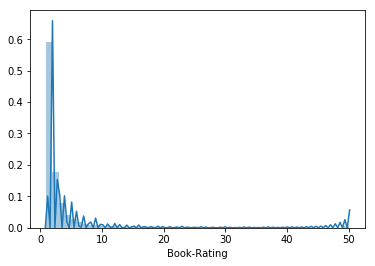

In [8]:
sns.distplot(data)

We clipped the data such that any ratings more than 50 would be classified as 50 for easier visualisation of the data.
Here we can see that most of the books have less than 10 ratings while a sizeable number of the ratings comes from a sall number of books. This is known as the **long tail** problem where a small number of books are rated by many while the rest are not really rated

In [9]:
df.groupby('ISBN')['Book-Rating'].count().sort_values(ascending=False)

ISBN
0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
044023722X     647
0679781587     639
0142001740     615
067976402X     614
0671027360     586
0446672211     585
059035342X     571
0316601950     568
0375727345     552
044021145X     529
0452282152     526
0440214041     523
0804106304     519
0440211727     517
0345337662     506
0060930535     494
0440226430     482
0312278586     474
0743418174     470
0671021001     468
0345370775     466
0446605239     465
0156027321     462
0440241073     456
0671003755     446
              ... 
0817303871       1
0817435344       1
0817425160       1
0817424245       1
0817404651       1
0817352600       1
0817311343       1
0817310916       1
0817310266       1
0817309012       1
0817308849       1
0817305114       1
0817304991       1
0817303987       1
0817301968       1
0817219986       1
0817300317       1
0817272860       1
0817268790       1
0817256261       1
0817256016       1
0817250

We can see that the top book is rated twice as much as the 2nd highest book and the 2nd book is also about twice as highly rated as the 3rd book , the ratings are skewed to the few books

### Reduced Dimensionality

Now let us reduce the dimenion of the data by reducing the size of the dataset


In [10]:
df = df[:100000]
df.shape

(100000, 3)

In [11]:
from surprise import KNNBasic,SVD, SVDpp, SlopeOne, NMF, NormalPredictor,KNNBaseline,KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering
from surprise import Dataset                                                     
from surprise import Reader   
from surprise.model_selection.validation import cross_validate
from surprise import dump
from surprise.accuracy import rmse

reader = Reader(rating_scale=(0, 9))
data = Dataset.load_from_df(df[['User-ID', 'ISBN', 'Book-Rating']], reader)

## Basic algorithms
1) NormalPredictor

NormalPredictor algorithm predicts a random rating based on the distribution of the training set, which is assumed to be normal. This is one of the most basic algorithms that do not do much work.

BaselineOnly

2) BaselineOnly algorithm predicts the baseline estimate for given user and item.

## k-NN algorithms
1) KNNBasic

KNNBasic is a basic collaborative filtering algorithm.

2) KNNWithMeans

KNNWithMeans is basic collaborative filtering algorithm, taking into account the mean ratings of each user.

3) KNNWithZScore

KNNWithZScore is a basic collaborative filtering algorithm, taking into account the z-score normalization of each user.

4) KNNBaseline

KNNBaseline is a basic collaborative filtering algorithm taking into account a baseline rating.

## Matrix Factorization-based algorithms
1) SVD

SVD algorithm is equivalent to Probabilistic Matrix Factorization

2) SVDpp

The SVDpp algorithm is an extension of SVD that takes into account implicit ratings.

3) NMF

NMF is a collaborative filtering algorithm based on Non-negative Matrix Factorization. It is very similar with SVD.

4) Slope One
SlopeOne is a straightforward implementation of the SlopeOne algorithm.

5) Co-clustering
Coclustering is a collaborative filtering algorithm based on co-clustering.

We use “rmse” as our accuracy metric for the predictions.

In [13]:
print('Using ALS')
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = BaselineOnly(bsl_options=bsl_options)
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

Using ALS
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'test_rmse': array([3.56175252, 3.58067797, 3.55794392]),
 'fit_time': (0.1453864574432373, 0.1524035930633545, 0.2246534824371338),
 'test_time': (0.18248581886291504, 0.25166845321655273, 0.17645692825317383)}

In [59]:
df

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


Here, we are using the baseline model and using alternating least square as the approach. Alternating least squares method reduces dimensionality and so is less computationally intensive yet is still accurate

In [15]:
from surprise.model_selection import train_test_split
from surprise import accuracy
trainset, testset = train_test_split(data, test_size=0.25)
algo = BaselineOnly(bsl_options=bsl_options)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
RMSE: 3.5639


3.563914158520161

In [16]:

def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]


In [17]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
0,20115,0590477412,0.0,0.0,{'was_impossible': False},406,2,0.0
16950,11601,0449214192,0.0,0.0,{'was_impossible': False},1199,1,0.0
22079,11601,0060973323,0.0,0.0,{'was_impossible': False},1199,1,0.0
23803,278418,1551665026,0.0,0.0,{'was_impossible': False},3420,2,0.0
8613,8487,0553266306,0.0,0.0,{'was_impossible': False},98,1,0.0
5756,278418,055357230X,0.0,0.0,{'was_impossible': False},3420,4,0.0
8633,11601,0399148779,0.0,0.0,{'was_impossible': False},1199,3,0.0
16946,12538,0380731614,0.0,0.0,{'was_impossible': False},1006,4,0.0
17093,10560,0439139600,9.0,9.0,{'was_impossible': False},76,9,0.0
3272,11601,0345404769,0.0,0.0,{'was_impossible': False},1199,6,0.0


In [18]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
3536,11601,0192815970,10.0,0.387863,{'was_impossible': False},1199,0,9.612137
8544,11601,0883623382,10.0,0.387863,{'was_impossible': False},1199,0,9.612137
9824,11601,037581177X,10.0,0.387863,{'was_impossible': False},1199,0,9.612137
22859,21014,0316781010,10.0,0.335539,{'was_impossible': False},591,4,9.664461
8012,16916,0671871005,10.0,0.257401,{'was_impossible': False},337,4,9.742599
16700,278418,0310912520,10.0,0.161648,{'was_impossible': False},3420,0,9.838352
8046,14521,0553269631,10.0,0.000000,{'was_impossible': False},407,3,10.000000
8907,11601,0553212257,10.0,0.000000,{'was_impossible': False},1199,1,10.000000
22894,14897,0515087947,10.0,0.000000,{'was_impossible': False},65,4,10.000000
21349,278418,0553271571,10.0,0.000000,{'was_impossible': False},3420,2,10.000000
